In [1]:
from joblib import dump, load
from help import helper
from help.utils import DatasetSequence, Timer
from keras.models import load_model
from help import helper
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import winsound
import os
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Train

In [2]:
use_gpu = True
use_image_generator = False

if not use_gpu:
    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if use_image_generator:
    dpaths = os.listdir('dataset/dump')
    helper.remove(dpaths, 'desktop.ini')
    path = []
    for dpath in dpaths:
        vectors = []
        images = os.listdir(f'dataset/dump/{dpath}')
        helper.remove(images, 'desktop.ini')
        for image in images:
            success = True if image.split('.')[1] == 't' else False
            if success:
                path.append(f'dataset/dump/{dpath}/{image}')
    path = np.array(path)
    print(path.shape)
else:
    x = load('dataset/vectors/ori/all.jlb')[:,:-1]
    print(x.shape)

hardware = 'gpu' if use_gpu else 'cpu'
generator = 'generator' if use_image_generator else 'no generator'

print(f'using {hardware} with {generator}')

mdl_already = [path.split('.')[3] for path in os.listdir('model/dae')]
helper.remove(mdl_already, 'desktop.ini')
mdl_already = np.unique(mdl_already)
aemdl = helper.aemodels()#.........................................................................percobaan pertama
aemdl = aemdl[::-1]
aemdl = helper.aemodels(cfrom=550, cto=450, cstep=10, n_layer=1)#..................................percobaan 'all'
aemdl = helper.aemodels(hfrom=1000, hto=1000, hstep=1, cfrom=500, cto=400, cstep=10, n_layer=2)#...percobaan Asia Tenggara
aemdl = helper.aemodels(cfrom=450, cto=350, cstep=10, n_layer=1)#..................................percobaan Asia Timur
aemdl = helper.aemodels(hfrom=1000, hto=1000, hstep=1, cfrom=550, cto=450, cstep=10, n_layer=2)#...percobaan Eropa Utara
aemdl = helper.aemodels(cfrom=450, cto=350, cstep=10, n_layer=1)#..................................percobaan Amerika Serikat
for mdl in aemdl:
    if mdl not in mdl_already:
        autoencoder, encoder, model_str, _ = helper.buildDAE(mdl, x.shape[1], h_activation='sigmoid', o_activation='linear')
        autoencoder.compile(optimizer='rmsprop', loss='mse')
#         autoencoder.summary()
        print(f'learning with {model_str} model ({autoencoder.count_params():,})...')
        timer = Timer().start()
        if use_image_generator:
            history = autoencoder.fit_generator(generator=DatasetSequence(path, 32, True, 'threading'), epochs=400)
        else:
            history = autoencoder.fit(x=x, y=x, epochs=400, batch_size=256, verbose=0)
        timer.end()

        tstr = timer.summary(f=0)
        encoder.save(f'model/dae/{hardware}.{generator}.encoder.{model_str}.{tstr}.h5')
        autoencoder.save(f'model/dae/{hardware}.{generator}.autoencoder.{model_str}.{tstr}.h5')
        dump(history, f'model/dae/{hardware}.{generator}.history.{model_str}.{tstr}.jlb')
        K.clear_session()
        print(f'{mdl} model was saved to disk ({timer.summary(f=0)})')
    else:
        print(f'{mdl} model is already learned')

(11685, 14500)
using gpu with no generator
450 model is already learned
440 model is already learned
430 model is already learned
420 model is already learned
410 model is already learned
400 model is already learned
390 model is already learned
380 model is already learned
370 model is already learned
360 model is already learned
350 model is already learned


### Plot loss

In [2]:
hpaths = helper.paths('model/dae/')
hpaths = hpaths[helper.swhere('history', hpaths)]
for idx, h in enumerate(hpaths):
    print(f'{idx} {h}')

0 model/dae/gpu.no generator.history.100.18 menit 56 detik.jlb
1 model/dae/gpu.no generator.history.1000-100.27 menit 50 detik.jlb
2 model/dae/gpu.no generator.history.1000-150.28 menit 24 detik.jlb
3 model/dae/gpu.no generator.history.1000-200.28 menit.jlb
4 model/dae/gpu.no generator.history.1000-250.28 menit 51 detik.jlb
5 model/dae/gpu.no generator.history.1000-300.28 menit 56 detik.jlb
6 model/dae/gpu.no generator.history.1000-350.28 menit 20 detik.jlb
7 model/dae/gpu.no generator.history.1000-400.28 menit 11 detik.jlb
8 model/dae/gpu.no generator.history.1000-410.28 menit 28 detik.jlb
9 model/dae/gpu.no generator.history.1000-420.29 menit 50 detik.jlb
10 model/dae/gpu.no generator.history.1000-430.29 menit 8 detik.jlb
11 model/dae/gpu.no generator.history.1000-440.28 menit 14 detik.jlb
12 model/dae/gpu.no generator.history.1000-450.28 menit 8 detik.jlb
13 model/dae/gpu.no generator.history.1000-460.31 menit 32 detik.jlb
14 model/dae/gpu.no generator.history.1000-470.31 menit 29 d

load model/dae/gpu.no generator.history.500.22 menit 47 detik.jlb
loaded
plot
plotted
[0.0067602561927844074, 0.004960783896350075, 0.0046860829930215325, 0.004425212770786533, 0.004207823768012611, 0.004022564081005692, 0.0038584589178900677, 0.003721909145404181, 0.0036102962480904994, 0.0035073016039512263, 0.0034229400311467173, 0.0033528273217029356, 0.003289002941237507, 0.0032261171562706346, 0.003173947181599673, 0.0031238142475700998, 0.003078039891074962, 0.0030375195800848415, 0.003003160171684995, 0.0029709916344652916, 0.002939800208551625, 0.0029122315530709453, 0.002888662746685422, 0.002869328243477022, 0.0028402022138288964, 0.0028201076639062976, 0.0028037446400785886, 0.0027855011310339113, 0.0027673936733130363, 0.00274927212592098, 0.002731438520634256, 0.0027212239412338205, 0.0027047665501399956, 0.0026890495527220055, 0.0026770823764677328, 0.0026668049524999297, 0.002656703957511534, 0.0026389770174520964, 0.002627793291745453, 0.002623486580848407, 0.002605805

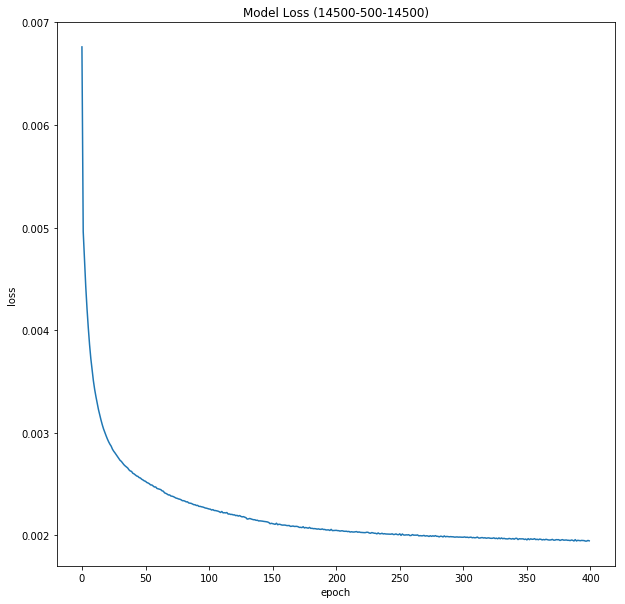

In [4]:
ke = 85
print(f'load {hpaths[ke]}')
history = load(hpaths[ke])
# history
print('loaded')
# print(history.history.keys())
print('plot')
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'][:])
plt.title('Model Loss (14500-500-14500)')
plt.ylabel('loss')
plt.xlabel('epoch')
print('plotted')
# plt.legend(['train', 'test'], loc='upper right')
print(history.history['loss'][:])
plt.show()

### Encode dataset

In [ ]:
epaths = np.array(os.listdir('model/dae'))
epaths = epaths[helper.swhere('.encoder', epaths)]
dbpaths = np.array(os.listdir('dataset/vectors/ori'))
daes = os.listdir('dataset/vectors/dae')
for epath in epaths:
    ename = epath.split('.')[3]
    
    # cek apakah perlu encoder atau tidak START
    needencoder = False
    for dbpath in dbpaths:
        dbname = dbpath.split('.')[0]
        if f'{dbname}.{ename}.jlb' not in daes:
            needencoder = True
            break
            
    if needencoder:
        encoder = load_model(f'model/dae/{epath}')
        for dbpath in dbpaths:
            dbname = dbpath.split('.')[0]
            if f'{dbname}.{ename}.jlb' not in daes:
                x = load(f'dataset/vectors/ori/{dbpath}')
                y = x[:,-1].reshape([x.shape[0], 1])
                x = encoder.predict(x[:,:-1])
                d = dump(np.hstack([x, y]), f'dataset/vectors/dae/{dbname}.{ename}.jlb')
                print(f'saved to {d[0]}')
        K.clear_session()